In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'C:\ANISHA\car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [7]:
data.shape

(112, 2)

In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [11]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [13]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [14]:
data['Price'].nunique()

35

# Frequency Graph

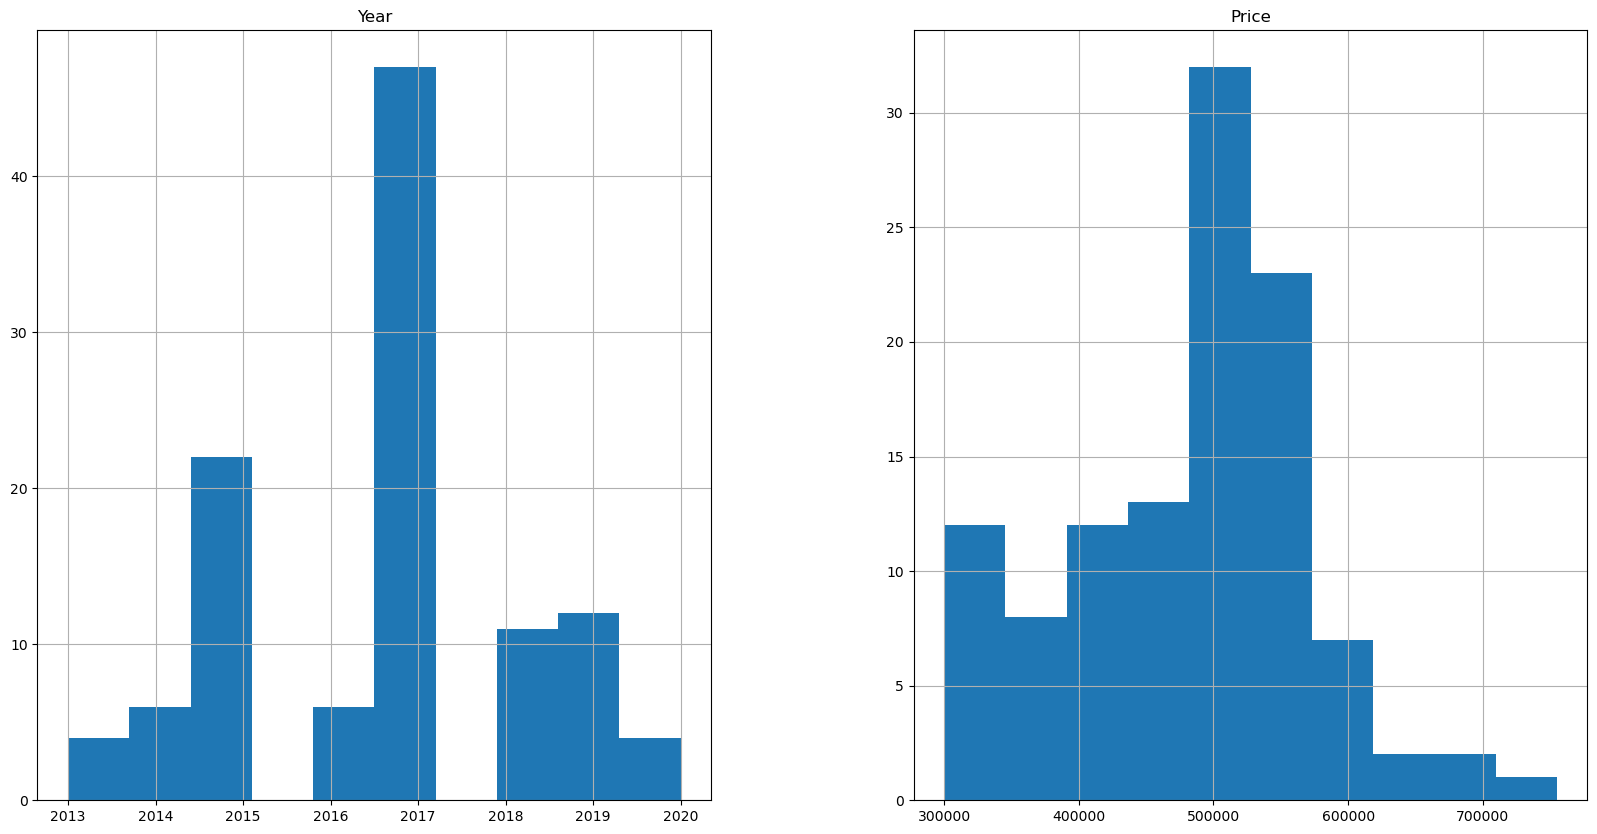

In [16]:
freqgraph=data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(20,10))
plt.show()

# Heatmap

<AxesSubplot:>

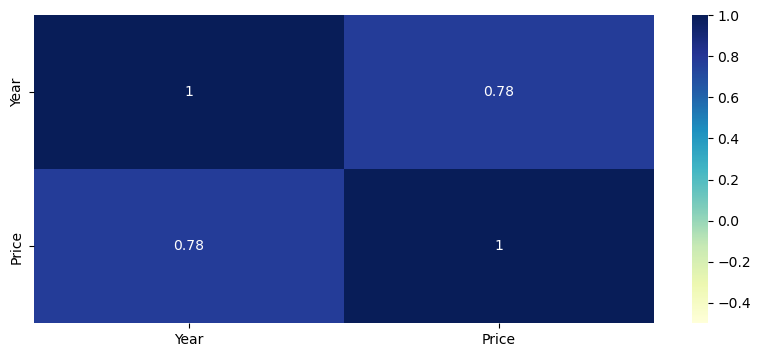

In [29]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.5,vmax=1,cmap='YlGnBu')

# Linear regression

In [31]:
y=data['Price']
x=data.drop(['Price'],axis=1)

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [65]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [66]:
model=lr.fit(x_train,y_train)

In [67]:
y_pred=model.predict(x_test)

In [68]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is : ',r2_score(y_test,y_pred))

MSE is :  4326906256.829671
R2 is :  0.36759313425902185


# Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso(alpha=1.0)

In [76]:
lasso.fit(x_train, y_train)
y_pred1=lasso.predict(x_test)
y_pred1

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [73]:
print("slope: %.2f"% lasso.coef_[0])

slope: 47608.16


In [74]:
print("Intercept: %.2f"% lasso.intercept_)

Intercept: -95520091.25


In [77]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred1))
print('R2 is : ',r2_score(y_test,y_pred1))

MSE is :  4326859771.015669
R2 is :  0.3675999284778446


# Normalization

In [38]:
from sklearn import preprocessing
x1=preprocessing.normalize(x)

In [39]:
x1

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [40]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [41]:
x1 = pd.DataFrame(x1,columns=(['year']))

In [42]:
x1.head()

,year
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [43]:
x1.describe()

,year
count,112.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.2)

In [51]:
from sklearn import linear_model
lr2 = linear_model.LinearRegression()
model2 = lr2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred2))
print('R2 is : ',r2_score(y_test,y_pred2))

MSE is :  4326906256.830068
R2 is :  0.3675931342589639


# Min-Max scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
x2=minmax.fit_transform(x)

In [47]:
x2 = pd.DataFrame(x2,columns=(['year']))

In [48]:
x2.head()

,year
0,0.714286
1,0.857143
2,0.857143
3,0.714286
4,0.714286


In [49]:
x2.describe()

,year
count,112.000000
mean,0.524235
std,0.232802
min,0.000000
25%,0.285714
50%,0.571429
75%,0.571429
max,1.000000


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,random_state=42,test_size=0.2)
lr3 = linear_model.LinearRegression()
model3 = lr3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
print('MSE is : ',mean_squared_error(y_test,y_pred3))
print('R2 is : ',r2_score(y_test,y_pred3))

MSE is :  4326906256.830068
R2 is :  0.3675931342589639
